In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem
from random import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_comb = pd.merge(mouse_drug_data, clinical_trial_data, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
trial_data_comb.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_gb = trial_data_comb.groupby(["Drug", "Timepoint"])
tumor_volume = drug_time_gb["Tumor Volume (mm3)"].mean()


# Convert to DataFrame
tumor_volume_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_volume})

# Preview DataFrame
tumor_volume_data = tumor_volume_df.reset_index()
tumor_volume_data


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = trial_data_comb.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error_df = pd.DataFrame({"Tumor Volume (mm3) Standard Error": standard_error})

# Preview DataFrame
standard_error_df = standard_error_df.reset_index()
standard_error_df



,Drug,Timepoint,Tumor Volume (mm3) Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_pivot = tumor_volume_data.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked

tumor_vol_pivot




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# consolodate data for graph
df = pd.DataFrame(tumor_vol_pivot)
df=df.drop(columns=['Ceftamin', 'Naftisol', "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
standard_error_df_1 = standard_error_df.pivot(index='Timepoint', columns='Drug',
                                              values='Tumor Volume (mm3) Standard Error')


df["Capomulin_err"]=standard_error_df_1["Capomulin"]
df["Infubinol_err"]=standard_error_df_1["Infubinol"]
df["Ketapril_err"]=standard_error_df_1["Ketapril"]
df["Placebo_err"]=standard_error_df_1["Placebo"]
df=df.reset_index()
df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_err,Infubinol_err,Ketapril_err,Placebo_err
0,0,45.000000,45.000000,45.000000,45.000000,0.000000,0.000000,0.000000,0.000000
1,5,44.266086,47.062001,47.389175,47.125589,0.448593,0.235102,0.264819,0.218091
2,10,43.084291,49.403909,49.582269,49.423329,0.702684,0.282346,0.357421,0.402064
3,15,42.064317,51.296397,52.399974,51.359742,0.838617,0.357705,0.580268,0.614461
4,20,40.716325,53.197691,54.920935,54.364417,0.909731,0.476210,0.726484,0.839609
5,25,39.939528,55.715252,57.678982,57.482574,0.881642,0.550315,0.755413,1.034872
6,30,38.769339,58.299397,60.994507,59.809063,0.934460,0.631061,0.934121,1.218231
7,35,37.816839,60.742461,63.371686,62.420615,1.052241,0.984155,1.127867,1.287481
8,40,36.958001,63.162824,66.068580,65.052675,1.223608,1.055220,1.158449,1.370634
9,45,36.236114,65.755562,70.662958,68.084082,1.223977,1.144427,1.453186,1.351726


(25, 75)

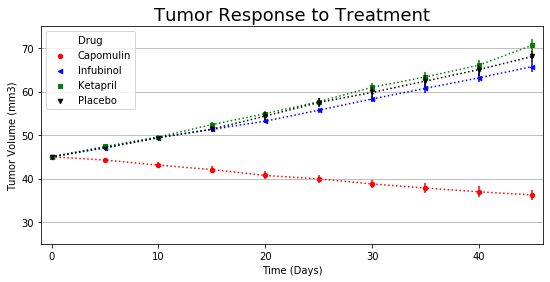

In [82]:
#plot scatter and standard error

ax = df.plot(kind='scatter', x="Timepoint", y= "Capomulin",
             color="red",label="Capomulin",yerr="Capomulin_err",marker='o',figsize=(9, 4)  )

df.plot(kind="scatter", x="Timepoint",y="Infubinol",
        color="blue",label="Infubinol",yerr="Infubinol_err", marker='<', ax=ax)

df.plot(kind="scatter", x="Timepoint",y="Ketapril", 
        color="green",label="Ketapril",yerr="Ketapril_err", marker='s', ax=ax)

df.plot(kind="scatter", x="Timepoint",y="Placebo",
        color="black",label="Placebo",yerr="Placebo_err", marker='v', ax=ax)


#add lines to plot

df.plot(kind='line', x="Timepoint",y="Capomulin",color="red",legend=False, linestyle="dotted", ax=ax)
df.plot(kind="line", x="Timepoint",y="Infubinol", color="blue",legend=False, linestyle="dotted", ax=ax)
df.plot(kind="line", x="Timepoint",y="Ketapril", color="green",legend=False, linestyle="dotted",ax=ax)
df.plot(kind="line", x="Timepoint",y="Placebo", color="black",legend=False,linestyle="dotted",ax=ax)

#format and titles
ax.yaxis.grid()
ax.set_title('Tumor Response to Treatment',fontsize= 18)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.xlim(-1, 46)
plt.ylim(25, 75)


In [88]:
# Save plot
fig = ax.get_figure()
fig.savefig("treatment.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [89]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_gb = trial_data_comb.groupby(["Drug", "Timepoint"])
metastatic_data = drug_time_gb["Metastatic Sites"].mean()

# Convert to DataFrame
metastatic_data_df = pd.DataFrame({"Metastatic Sites": metastatic_data})


# Preview DataFrame
metastatic_data_df = metastatic_data_df.reset_index()
metastatic_data_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [94]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = trial_data_comb.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
standard_error_df = pd.DataFrame({"Metastatic Sites": standard_error})

# Preview DataFrame
standard_error_df = standard_error_df.reset_index()
standard_error_df



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [95]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_data_pivot= metastatic_data_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

metastatic_data_pivot




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [96]:
# consolodate data for graph
df = pd.DataFrame(metastatic_data_pivot)
df=df.drop(columns=['Ceftamin', 'Naftisol', "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
standard_error_df_1 = standard_error_df.pivot(index='Timepoint', columns='Drug',
                                              values='Metastatic Sites')


df["Capomulin_err"]=standard_error_df_1["Capomulin"]
df["Infubinol_err"]=standard_error_df_1["Infubinol"]
df["Ketapril_err"]=standard_error_df_1["Ketapril"]
df["Placebo_err"]=standard_error_df_1["Placebo"]
df=df.reset_index()
df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_err,Infubinol_err,Ketapril_err,Placebo_err
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000,0.074833,0.091652,0.098100,0.100947
2,10,0.320000,0.666667,0.590909,0.833333,0.125433,0.159364,0.142018,0.115261
3,15,0.375000,0.904762,0.842105,1.250000,0.132048,0.194015,0.191381,0.190221
4,20,0.652174,1.050000,1.210526,1.526316,0.161621,0.234801,0.236680,0.234064
5,25,0.818182,1.277778,1.631579,1.941176,0.181818,0.265753,0.288275,0.263888
6,30,1.090909,1.588235,2.055556,2.266667,0.172944,0.227823,0.347467,0.300264
7,35,1.181818,1.666667,2.294118,2.642857,0.169496,0.224733,0.361418,0.341412
8,40,1.380952,2.100000,2.733333,3.166667,0.175610,0.314466,0.315725,0.297294
9,45,1.476190,2.111111,3.363636,3.272727,0.202591,0.309320,0.278722,0.304240


(-0.05, 4)

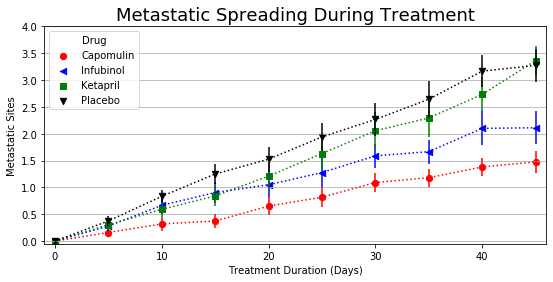

In [105]:
#plot scatter and standard error

ax = df.plot(kind='scatter', x="Timepoint", y= "Capomulin",
             color="red",label="Capomulin",yerr="Capomulin_err",marker='o',s=40,figsize=(9, 4)  )

df.plot(kind="scatter", x="Timepoint",y="Infubinol",
        color="blue",label="Infubinol",yerr="Infubinol_err", marker='<',s=40, ax=ax)

df.plot(kind="scatter", x="Timepoint",y="Ketapril", 
        color="green",label="Ketapril",yerr="Ketapril_err", marker='s',s=40, ax=ax)

df.plot(kind="scatter", x="Timepoint",y="Placebo",
        color="black",label="Placebo",yerr="Placebo_err", marker='v',s=40, ax=ax)


#add lines to plot

df.plot(kind='line', x="Timepoint",y="Capomulin",color="red",legend=False, linestyle="dotted", ax=ax)
df.plot(kind="line", x="Timepoint",y="Infubinol", color="blue",legend=False, linestyle="dotted", ax=ax)
df.plot(kind="line", x="Timepoint",y="Ketapril", color="green",legend=False, linestyle="dotted",ax=ax)
df.plot(kind="line", x="Timepoint",y="Placebo", color="black",legend=False,linestyle="dotted",ax=ax)

#format and titles
ax.yaxis.grid()
ax.set_title('Metastatic Spreading During Treatment',fontsize= 18)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")

plt.xlim(-1, 46)
plt.ylim(-.05, 4)


In [106]:
fig_2 = ax.get_figure()
fig_2.savefig("Metastatic.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [114]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
live_gb = trial_data_comb.groupby(["Drug", "Timepoint"])
survival = live_gb["Mouse ID"].count()

# Convert to DataFrame
survival_df = pd.DataFrame({"Mouse Count": survival})
survival_df=survival_df.reset_index()

# Preview DataFrame
survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [115]:
# Minor Data Munging to Re-Format the Data Frames
survival_df_pivot= survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
survival_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [130]:
# Calculate percentages * 100
Capomulin = survival_df_pivot.loc[ : , 'Capomulin' ]/survival_df_pivot.loc[ : , 'Capomulin' ].max()*100
Infubinol = survival_df_pivot.loc[ : , 'Infubinol' ]/survival_df_pivot.loc[ : , 'Infubinol' ].max()*100
Ketapril = survival_df_pivot.loc[ : , 'Ketapril' ]/survival_df_pivot.loc[ : , 'Ketapril' ].max()*100
Placebo = survival_df_pivot.loc[ : , 'Placebo' ]/survival_df_pivot.loc[ : , 'Placebo' ].max()*100

# Create dataframe for plot
survival_percent_df = pd.DataFrame({"Capomulin": Capomulin,
                                    "Infubinol": Infubinol,
                                    "Ketapril": Ketapril,
                                    "Placebo": Placebo,
                                   })
df=survival_percent_df.reset_index()

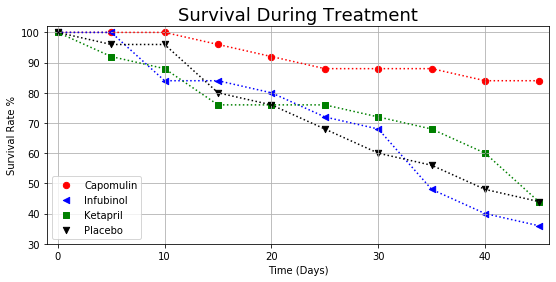

In [139]:
# Generate the Plot (Accounting for percentages)
ax = df.plot(kind='scatter', x="Timepoint", y= "Capomulin",
             color="red",label="Capomulin",marker='o',s=40,figsize=(9, 4)  )

df.plot(kind="scatter", x="Timepoint",y="Infubinol",
        color="blue",label="Infubinol", marker='<',s=40, ax=ax)

df.plot(kind="scatter", x="Timepoint",y="Ketapril", 
        color="green",label="Ketapril", marker='s',s=40, ax=ax)

df.plot(kind="scatter", x="Timepoint",y="Placebo",
        color="black",label="Placebo", marker='v',s=40, ax=ax)


#add lines to plot

df.plot(kind='line', x="Timepoint",y="Capomulin",color="red",legend=False, linestyle="dotted", ax=ax)
df.plot(kind="line", x="Timepoint",y="Infubinol", color="blue",legend=False, linestyle="dotted", ax=ax)
df.plot(kind="line", x="Timepoint",y="Ketapril", color="green",legend=False, linestyle="dotted",ax=ax)
df.plot(kind="line", x="Timepoint",y="Placebo", color="black",legend=False,linestyle="dotted",ax=ax)

#format and titles
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Survival During Treatment',fontsize= 18)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate %")

plt.xlim(-1, 46)
plt.ylim(30, 102)


# Save the Figure

fig_3 = ax.get_figure()
fig_3.savefig("Survival.png")






![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [141]:
# Calculate the percent changes for each drug
change = pd.DataFrame(tumor_vol_pivot)
change
# Display the data to confirm


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [226]:
# Calculate percentages * 100
Capomulin = (1-(change.loc[ [45] , 'Capomulin' ]/change.loc[ [0] , 'Capomulin' ].max()))*(-1)*100
Infubinol = (1-(change.loc[ [45] , 'Infubinol' ]/change.loc[ [0] , 'Infubinol' ].max()))*(-1)*100
Ketapril = (1-(change.loc[ [45] , 'Ketapril' ]/change.loc[ [0] , 'Ketapril' ].max()))*(-1)*100
Placebo = (1-(change.loc[ [45] , 'Placebo' ]/change.loc[ [0] , 'Placebo' ].max()))*(-1)*100

                               
# Create dataframe for plot
tumor_percent_df = pd.DataFrame({"Capomulin": Capomulin,
                                    "Infubinol": Infubinol,
                                    "Ketapril": Ketapril,
                                    "Placebo": Placebo,
                                   })
df=tumor_percent_df.transpose()



df

Timepoint,45
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


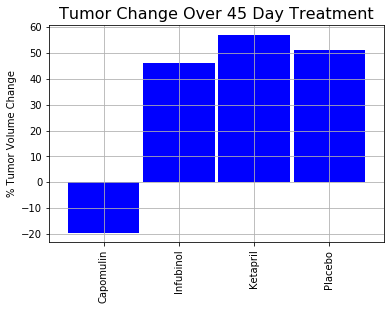

In [257]:

ax = df.plot(kind='bar',legend=None, width=.95, color="b" )


# ax.set_xticklabels(['Capomulin', 'Dick', 'Harry', 'Sally', 'Sue'])
ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Tumor Change Over 45 Day Treatment',fontsize= 16)
ax.set_ylabel("% Tumor Volume Change")

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
fig_4 = ax.get_figure()
fig_4.savefig("Change.png")

# Show the Figure


![Metastatic Spread During Treatment](../Images/change.png)

# Data Analysis
1. In a analysis of the treatment drugs Capomulin, Infubinol and Ketapril on the effects of tumor groth in mice, the treatment drug Capomulin was the sole drug shown to reduced tumor volume with a volume reduction of 19.5% over the 45 day trial period. Infubinol and Ketapril both showed tumor volume increase consistant with the tumor growth in mice in the control (Placebo) group.  

2. While none of the drugs tested fully prevented the spread of tumors, Capomulin was most effective in reducing the spread of tumors over the test period.

3. Mice given Capomulin had significatly higher survial rates than mice given Infubinol and Ketapril.  